<img src = "https://github.com/VeryFatBoy/notebooks/blob/main/common/images/img_github_singlestore-jupyter_featured_2.png?raw=true">

<div id="singlestore-header" style="display: flex; background-color: rgba(235, 249, 245, 0.25); padding: 5px;">
    <div id="icon-image" style="width: 90px; height: 90px;">
        <img width="100%" height="100%" src="https://raw.githubusercontent.com/singlestore-labs/spaces-notebooks/master/common/images/header-icons/browser.png" />
    </div>
    <div id="text" style="padding: 5px; margin-left: 10px;">
        <div id="badge" style="display: inline-block; background-color: rgba(0, 0, 0, 0.15); border-radius: 4px; padding: 4px 8px; align-items: center; margin-top: 6px; margin-bottom: -2px; font-size: 80%">SingleStore Notebooks</div>
        <h1 style="font-weight: 500; margin: 8px 0 0 4px;">Using SingleStoreDB to map crimes and visualise hot routes</h1>
    </div>
</div>

In [3]:
!pip cache purge --quiet

In [4]:
!pip install folium --quiet
!pip install geopandas --quiet
!pip install matplotlib --quiet

In [5]:
import folium
import geopandas as gpd
import pandas as pd
import warnings

from branca.colormap import linear
from folium import plugins
from folium.plugins import HeatMap
from shapely import wkt
from singlestoredb import notebook as nb

warnings.filterwarnings("ignore")

In [6]:
from sqlalchemy import *

db_connection = create_engine(connection_url)

In [8]:
bakerloo_stops = pd.read_sql(
    "SELECT * FROM bakerloo_stops",
    con = db_connection
)

bakerloo_stops = gpd.GeoDataFrame(bakerloo_stops)
bakerloo_stops["geometry"] = bakerloo_stops["geometry"].apply(wkt.loads)
bakerloo_stops.set_geometry("geometry", inplace = True)
bakerloo_stops.set_crs(epsg = 4326, inplace = True)

,stn_name,geometry
0,Embankment,POINT (-0.12267 51.50706)
1,Kilburn Park,POINT (-0.19423 51.53498)
2,Edgware Road,POINT (-0.17015 51.5203)
3,Piccadilly Circus,POINT (-0.1338 51.51005)
4,Warwick Avenue,POINT (-0.18378 51.52326)
5,Harlesden,POINT (-0.25777 51.53631)
6,Stonebridge Park,POINT (-0.27586 51.54404)
7,North Wembley,POINT (-0.30399 51.56258)
8,Regent's Park,POINT (-0.14644 51.52334)
9,Kenton,POINT (-0.31695 51.58179)


[]

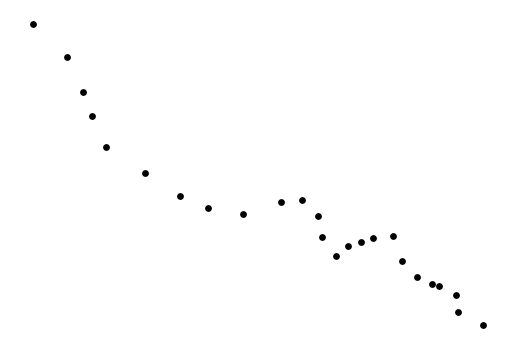

In [9]:
stops = bakerloo_stops.plot(color = "black", markersize = 15)

stops.set_axis_off()

stops.plot()

In [10]:
bakerloo_sections = pd.read_sql(
    "SELECT * FROM bakerloo_sections",
    con = db_connection
)

bakerloo_sections = gpd.GeoDataFrame(bakerloo_sections)
bakerloo_sections["geometry"] = bakerloo_sections["geometry"].apply(wkt.loads)
bakerloo_sections.set_geometry("geometry", inplace = True)
bakerloo_sections.set_crs(epsg = 4326, inplace = True)

,geometry
0,"LINESTRING (-0.20488 51.53444, -0.19423 51.53498)"
1,"LINESTRING (-0.19423 51.53498, -0.18576 51.52978)"
2,"LINESTRING (-0.17015 51.5203, -0.16301 51.5216)"
3,"LINESTRING (-0.24301 51.53256, -0.22505 51.53054)"
4,"LINESTRING (-0.22505 51.53054, -0.20488 51.53444)"
5,"LINESTRING (-0.18576 51.52978, -0.18378 51.52326)"
6,"LINESTRING (-0.17616 51.51698, -0.17015 51.5203)"
7,"LINESTRING (-0.30845 51.57023, -0.30399 51.56258)"
8,"LINESTRING (-0.25777 51.5363, -0.24301 51.53256)"
9,"LINESTRING (-0.18378 51.52326, -0.17616 51.51698)"


[]

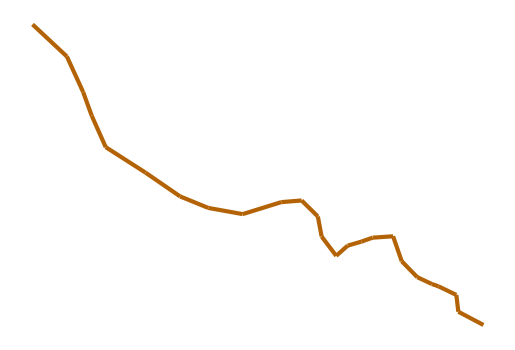

In [11]:
sections = bakerloo_sections.plot(color = "#B36305", linewidth = 3)

sections.set_axis_off()

sections.plot()

[]

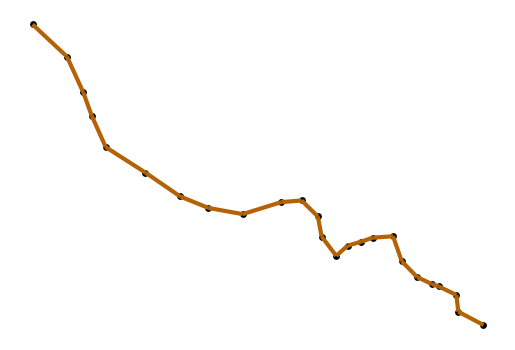

In [12]:
base = bakerloo_sections.plot(color = "#B36305", linewidth = 3)

bakerloo_stops.plot(ax = base, color = "black", markersize = 15)

base.set_axis_off()

base.plot()

In [13]:
crimes = pd.read_sql(
    "SELECT * FROM crimes",
    con = db_connection
)

crimes = gpd.GeoDataFrame(crimes)
crimes["geometry"] = crimes["geometry"].apply(wkt.loads)
crimes.set_geometry("geometry", inplace = True)
crimes.set_crs(epsg = 4326, inplace = True)

,crime_type,geometry
0,Public order,POINT (-1.33081 53.0182)
1,Public order,POINT (-0.64043 50.8308)
2,Violence and sexual offences,POINT (-0.64043 50.8308)
3,Criminal damage and arson,POINT (0.87772 51.14515)
4,Public order,POINT (0.87772 51.14515)
...,...,...
5356,Violence and sexual offences,POINT (-3.71546 55.9846)
5357,Violence and sexual offences,POINT (-4.40563 55.9076)
5358,Violence and sexual offences,POINT (-3.2174 55.94565)
5359,Violence and sexual offences,POINT (-4.42463 55.848)


[]

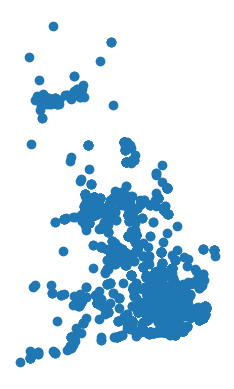

In [14]:
btp_crimes = crimes.plot()

btp_crimes.set_axis_off()

btp_crimes.plot()

In [15]:
bakerloo_line_buff = pd.read_sql(
    "SELECT * FROM bakerloo_line_buff",
    con = db_connection
)

bakerloo_line_buff = gpd.GeoDataFrame(bakerloo_line_buff)
bakerloo_line_buff["geometry"] = bakerloo_line_buff["geometry"].apply(wkt.loads)
bakerloo_line_buff.set_geometry("geometry", inplace = True)
bakerloo_line_buff.set_crs(epsg = 4326, inplace = True)

,geometry
0,"POLYGON ((-0.33238 51.59654, -0.33282 51.59676..."


[]

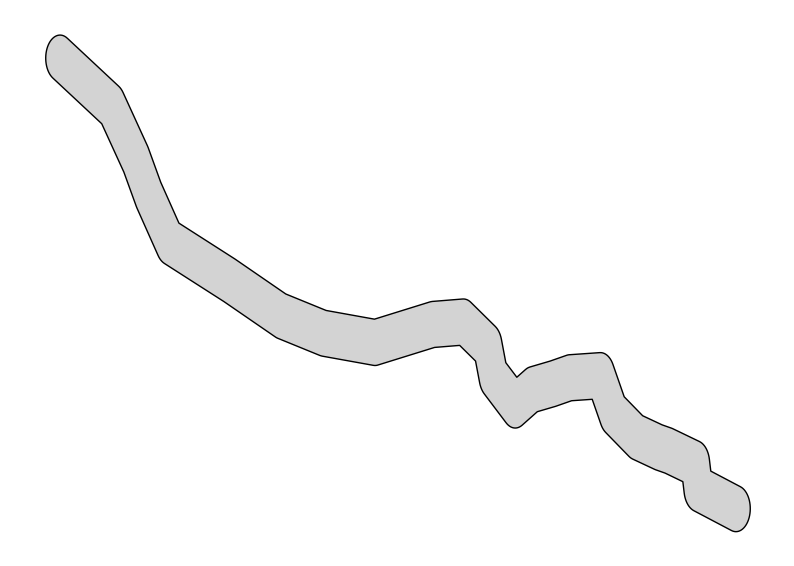

In [16]:
base = bakerloo_line_buff.plot(
    color = "lightgrey",
    edgecolor = "black",
    figsize = (10, 10)
)

base.set_axis_off()

base.plot()

In [17]:
crimes = bakerloo_line_buff.overlay(
    crimes,
    how = "intersection",
    keep_geom_type = False
)

In [18]:
crimes

,crime_type,geometry
0,Violence and sexual offences,POINT (-0.27546 51.544)
1,Violence and sexual offences,POINT (-0.29606 51.5515)
2,Public order,POINT (-0.2051 51.5344)
3,Bicycle theft,POINT (-0.33486 51.59279)
4,Other theft,POINT (-0.29606 51.5515)
...,...,...
351,Theft from the person,POINT (-0.12826 51.5113)
352,Other theft,POINT (-0.1248 51.50836)
353,Theft from the person,POINT (-0.13405 51.5101)
354,Theft from the person,POINT (-0.13405 51.5101)


[]

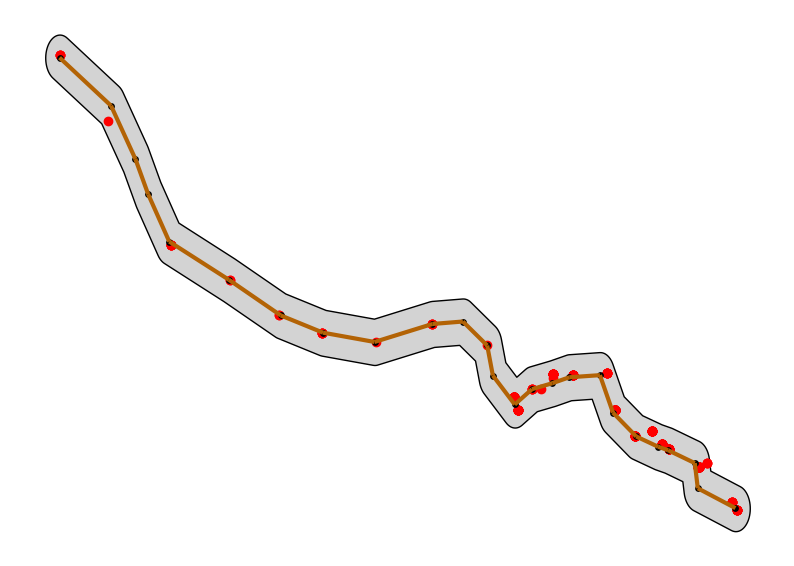

In [19]:
base = bakerloo_line_buff.plot(
    color = "lightgrey",
    edgecolor = "black",
    figsize = (10, 10)
)

bakerloo_sections.plot(ax = base, color = "#B36305", linewidth = 3)

crimes.plot(ax = base, color = "red")

bakerloo_stops.plot(ax = base, color = "black", markersize = 15)

base.set_axis_off()

base.plot()

In [21]:
bline_segments = gpd.sjoin_nearest(crimes, bakerloo_sections)

bline_segments.rename(
    columns = {"index_right" : "segment"}, inplace = True
)

In [22]:
bline_segments.head()

,crime_type,geometry,segment
0,Violence and sexual offences,POINT (-0.27546 51.544),20
1,Violence and sexual offences,POINT (-0.29606 51.5515),16
2,Public order,POINT (-0.2051 51.5344),4
3,Bicycle theft,POINT (-0.33486 51.59279),11
4,Other theft,POINT (-0.29606 51.5515),16


In [23]:
sections_freq = gpd.GeoDataFrame(
    bline_segments["segment"].value_counts()
).reset_index()

sections_freq.rename(
    columns = {"segment" : "freq"}, inplace = True
)

In [ ]:
sections_freq

In [24]:
bakerloo_sections = bakerloo_sections.join(sections_freq)

bakerloo_sections["freq"].fillna(0, inplace = True)

In [25]:
bakerloo_sections.head()

,geometry,freq,count
0,"LINESTRING (-0.20488 51.53444, -0.19423 51.53498)",18.0,84.0
1,"LINESTRING (-0.19423 51.53498, -0.18576 51.52978)",21.0,74.0
2,"LINESTRING (-0.17015 51.5203, -0.16301 51.5216)",9.0,44.0
3,"LINESTRING (-0.24301 51.53256, -0.22505 51.53054)",23.0,21.0
4,"LINESTRING (-0.22505 51.53054, -0.20488 51.53444)",14.0,21.0


In [26]:
midpoint_crimes = bakerloo_sections["freq"].mean()

In [27]:
midpoint_crimes

10.375

[]

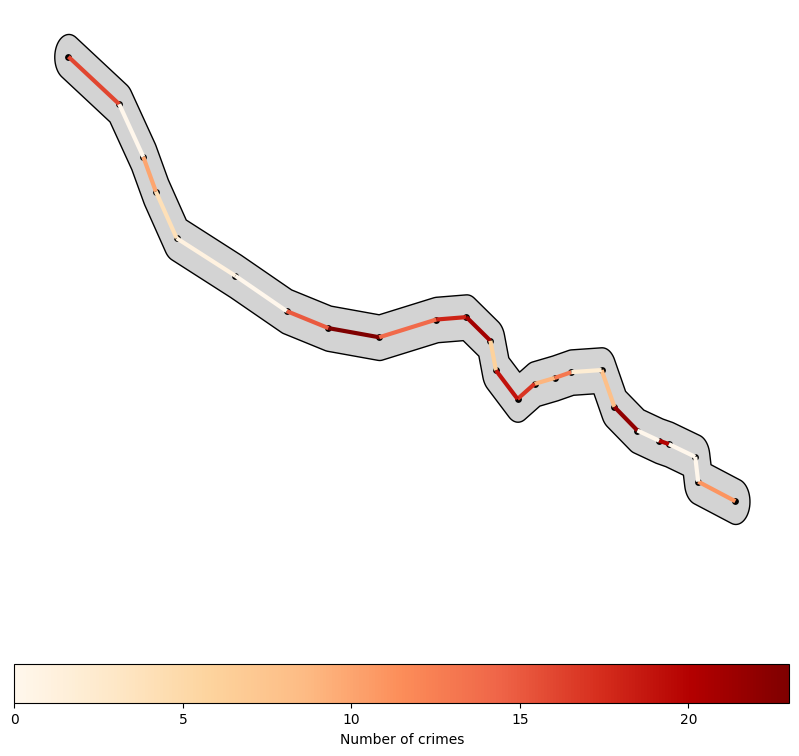

In [28]:
base = bakerloo_line_buff.plot(
    color = "lightgrey",
    edgecolor = "black",
    figsize = (10, 10)
)

bakerloo_sections.plot(
    ax = base,
    column = "freq",
    linewidth = 3,
    cmap = "OrRd",
    legend = True,
    legend_kwds = {"label" : "Number of crimes", "orientation" : "horizontal"}
)

bakerloo_stops.plot(ax = base, color = "black", markersize = 15)

base.set_axis_off()

base.plot()

In [29]:
bakerloo_sections.to_crs(epsg = 3310, inplace = True)

In [31]:
bakerloo_sections["length"] = bakerloo_sections["geometry"].length

In [ ]:
bakerloo_sections.length.sum()

In [32]:
bakerloo_sections.to_crs(epsg = 4326, inplace = True)

In [ ]:
bakerloo_sections.head()

In [33]:
bakerloo_sections["crime_per_m"] = bakerloo_sections["freq"] / bakerloo_sections["length"]

In [34]:
bakerloo_sections.head()

,geometry,freq,count,length,crime_per_m
0,"LINESTRING (-0.20488 51.53444, -0.19423 51.53498)",18.0,84.0,769.032509,0.023406
1,"LINESTRING (-0.19423 51.53498, -0.18576 51.52978)",21.0,74.0,826.686001,0.025403
2,"LINESTRING (-0.17015 51.5203, -0.16301 51.5216)",9.0,44.0,532.677413,0.016896
3,"LINESTRING (-0.24301 51.53256, -0.22505 51.53054)",23.0,21.0,1310.887408,0.017545
4,"LINESTRING (-0.22505 51.53054, -0.20488 51.53444)",14.0,21.0,1511.236224,0.009264


[]

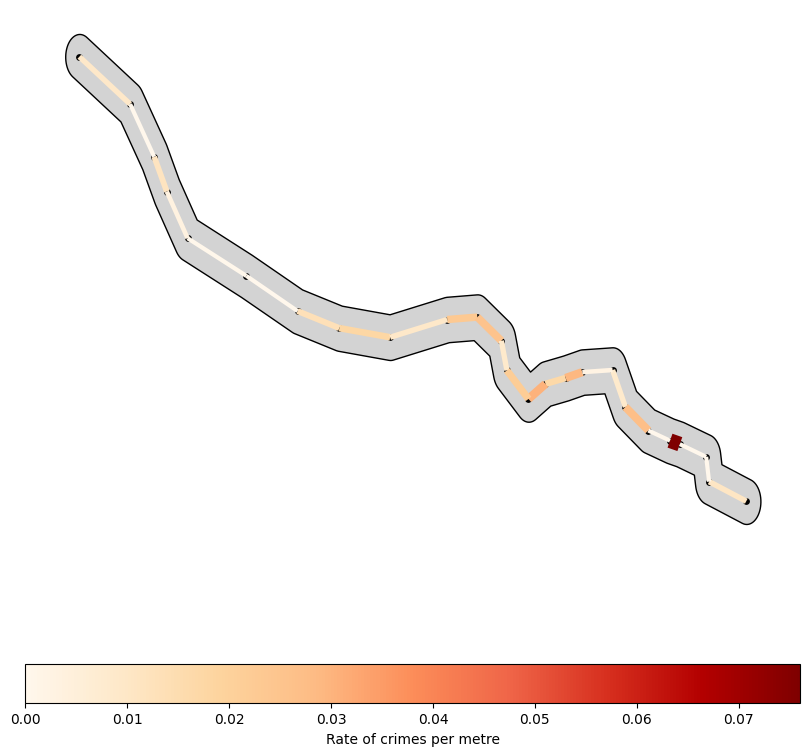

In [35]:
base = bakerloo_line_buff.plot(
    color = "lightgrey",
    edgecolor = "black",
    figsize = (10, 10)
)

bakerloo_sections.plot(
    ax = base,
    column = "crime_per_m",
    linewidth = 3 + bakerloo_sections["crime_per_m"] * 100,
    cmap = "OrRd",
    legend = True,
    legend_kwds = {"label" : "Rate of crimes per metre", "orientation" : "horizontal"}
)

bakerloo_stops.plot(ax = base, color = "black", markersize = 15)

base.set_axis_off()

base.plot()

In [36]:
London = [51.509865, -0.118092]

m = folium.Map(
    location = London,
    control_scale = True,
    zoom_start = 14
)

folium.GeoJson(
    bakerloo_line_buff
).add_to(folium.FeatureGroup(name = "Buffer").add_to(m))

HeatMap(
    data = list(zip(crimes.geometry.y, crimes.geometry.x))
).add_to(folium.FeatureGroup(name = "Crime Heat Map").add_to(m))

colormap = linear.OrRd_09.scale(
    bakerloo_sections.crime_per_m.min(),
    bakerloo_sections.crime_per_m.max()
)
colormap.caption = "Rate of crimes per metre"
colormap.add_to(m)

for i in range(0, len(bakerloo_sections)):
    x, y = bakerloo_sections.geometry.iloc[i].coords.xy
    folium.PolyLine(
        locations = [(y[0], x[0]), (y[1], x[1])],
        color = colormap(bakerloo_sections["crime_per_m"][i]),
        weight = 3 + bakerloo_sections["crime_per_m"][i] * 100,
        opacity = 1
    ).add_to(m)

stations_group = folium.FeatureGroup(name = "Stations").add_to(m)

for i in range(0, len(bakerloo_stops)):
    stations_group.add_child(folium.Marker(
        icon = folium.Icon(
            color = "red",
            icon = "train",
            icon_color = "white",
            prefix = "fa"
        ),
        location = [bakerloo_stops.geometry[i].y, bakerloo_stops.geometry[i].x],
        popup = bakerloo_stops.stn_name[i],
    )
)

crimes_group = folium.FeatureGroup(name = "Crimes").add_to(m)

for i in range(0, len(crimes)):
    crimes_group.add_child(folium.Marker(
        icon = folium.Icon(icon = "info-sign"),
        location = [crimes.geometry[i].y, crimes.geometry[i].x],
        popup = crimes["crime_type"][i]
    )
)

folium.LayerControl().add_to(m)

plugins.Fullscreen(
    position = "topright",
    title = "Fullscreen",
    title_cancel = "Exit",
    force_separate_button = True
).add_to(m)

html_content = m._repr_html_()

In [38]:
with nb.stage.open("map.html", "w") as st:
    st.write(html_content)